# 1. Install Dependencies

In [ ]:
!pip install labelme albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.6.1-py3-none-any.whl size=1439272 sha256=f4df6f0b2

# 1.2 Importing Data

In [1]:
import os
import time
import uuid
import cv2

In [7]:
IMAGES_PATH_train = os.path.join('data','train')
IMAGES_PATH_test = os.path.join('data','test')
IMAGES_PATH_val = os.path.join('data','val')

final_path_train = os.path.join(IMAGES_PATH_train, 'images')
final_path_test = os.path.join(IMAGES_PATH_test, 'images')
final_path_val = os.path.join(IMAGES_PATH_val, 'images')

for folder in [final_path_train, final_path_test, final_path_val]:
 os.makedirs(folder, exist_ok=True)


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/images/
   creating: data/images/.ipynb_checkpoints/
  inflating: data/images/images.7547e2ba-3b8d-11f0-9f8e-30d042133894.jpg  
  inflating: data/images/images.7697be92-3b8d-11f0-ac01-30d042133894.jpg  
  inflating: data/images/images.77cc111c-3b8d-11f0-a79d-30d042133894.jpg  
  inflating: data/images/images.790088c2-3b8d-11f0-a544-30d042133894.jpg  
  inflating: data/images/images.7a34cf19-3b8d-11f0-ba0c-30d042133894.jpg  
  inflating: data/images/images.7b67cd49-3b8d-11f0-9356-30d042133894.jpg  
  inflating: data/images/images.7c9bf3ef-3b8d-11f0-8113-30d042133894.jpg  
  inflating: data/images/images.7dd02b91-3b8d-11f0-a3bd-30d042133894.jpg  
  inflating: data/images/images.7f04a71d-3b8d-11f0-a478-30d042133894.jpg  
  inflating: data/images/images.8038d618-3b8d-11f0-8ecc-30d042133894.jpg  
  inflating: data/images/images.816e09d2-3b8d-11f0-87dd-30d042133894.jpg  
  inflating: data/images/images.82a229da-3b8d-11f0-a7a4-30d042133894.jpg  
  inflatin

In [5]:
import os

# Define the base directory
BASE_DIR = 'aug_data'

# Define subfolders
folders = ['train', 'val', 'test']
subfolders = ['images', 'labels']

# Create the base directory and subfolders
for folder in folders:
  for subfolder in subfolders:
   path = os.path.join(BASE_DIR, folder)
   final_path = os.path.join(path,subfolder)
   os.makedirs(final_path, exist_ok=True)  # Create directories, ignoring if they already exist


In [11]:
import os
import random
import shutil

# Define source and destination paths
source_dir = 'data/images'
train_images_dir = 'data/train/images'


# Get a list of all image files in the source directory
try:
    # List all files in the source directory
    all_files = os.listdir(source_dir)
    # Filter for image files (assuming .jpg and .png, you can add more extensions if needed)
    image_files = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

except FileNotFoundError:
    print(f"Error: Source directory not found: {source_dir}")
    image_files = [] # Set to empty list if source directory is not found

# Check if there are enough images
if len(image_files) < 2:
    print(f"Warning: Only found {len(image_files)} images in {source_dir}. Need at least 63 to pick.")
    num_images_to_pick = len(image_files) # Pick all available if less than 63
else:
    num_images_to_pick = 2

# Randomly select 63 image files
if num_images_to_pick > 0:
    selected_images = random.sample(image_files, num_images_to_pick)

    # Move the selected images to the destination directory
    print(f"Moving {num_images_to_pick} random images from {source_dir} to {train_images_dir}...")
    for image_file in selected_images:
        source_path = os.path.join(source_dir, image_file)
        destination_path = os.path.join(train_images_dir, image_file)
        try:
            shutil.move(source_path, destination_path)
            # print(f"Moved: {image_file}") # Uncomment for detailed output
        except FileNotFoundError:
            print(f"Error: File not found during move: {source_path}")
        except Exception as e:
            print(f"An error occurred while moving {image_file}: {e}")

    print("Image moving process completed.")
else:
    print("No images found or selected to move.")

# Optional: Verify the contents of the directories after moving
# print("\nImages remaining in source directory:")
# print(os.listdir(source_dir))
# print("\nImages in train/images directory:")
# print(os.listdir(train_images_dir))

Moving 2 random images from data/images to data/train/images...
Image moving process completed.


# 3. Annotating Images using LabelMe

In [ ]:
!labelme

/bin/bash: line 1: labelme: command not found


# 4. Building Pipeline And Load Image

### 2.1 Importing Dependencies

In [12]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.3 Load Image into TF Data Pipeline

In [ ]:
!unzip "data.zip"

Archive:  data.zip
   creating: data/
   creating: data/images/
   creating: data/images/.ipynb_checkpoints/
  inflating: data/images/images.7547e2ba-3b8d-11f0-9f8e-30d042133894.jpg  
  inflating: data/images/images.7697be92-3b8d-11f0-ac01-30d042133894.jpg  
  inflating: data/images/images.77cc111c-3b8d-11f0-a79d-30d042133894.jpg  
  inflating: data/images/images.790088c2-3b8d-11f0-a544-30d042133894.jpg  
  inflating: data/images/images.7a34cf19-3b8d-11f0-ba0c-30d042133894.jpg  
  inflating: data/images/images.7b67cd49-3b8d-11f0-9356-30d042133894.jpg  
  inflating: data/images/images.7c9bf3ef-3b8d-11f0-8113-30d042133894.jpg  
  inflating: data/images/images.7dd02b91-3b8d-11f0-a3bd-30d042133894.jpg  
  inflating: data/images/images.7f04a71d-3b8d-11f0-a478-30d042133894.jpg  
  inflating: data/images/images.8038d618-3b8d-11f0-8ecc-30d042133894.jpg  
  inflating: data/images/images.816e09d2-3b8d-11f0-87dd-30d042133894.jpg  
  inflating: data/images/images.82a229da-3b8d-11f0-a7a4-30d0421338

In [14]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [24]:
import os
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0]+'.'+file.split('.')[1]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [22]:
file = "image1.xyz.jpg"
file.split('.')
print(file.split('.')[0]+'.'+file.split('.')[1]+'.json')


image1.xyz.json


# 4. Image Augmentation on Images and Label it using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [25]:
import albumentations as alb

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.7'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [26]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [27]:
img = cv2.imread(os.path.join('data','train', 'images','10e686d8-a40e-11ef-a0ed-18473da52c96.jpg'))

In [28]:
try:
  with open(os.path.join('data', 'train', 'labels', '10e686d8-a40e-11ef-a0ed-18473da52c96.json'), 'r') as f:
    label = json.load(f)

except json.JSONDecodeError:
    print("Error: The JSON file is corrupted.")
except FileNotFoundError:
    print("Error: The file does not exist.")


Error: The file does not exist.


### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [30]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

NameError: name 'label' is not defined

In [31]:
coords

[0, 0, 0, 0]

In [ ]:
coords = np.divide(coords, [640,480,640,480])

In [ ]:
coords

array([0.12268201, 0.01350733, 0.7888908 , 0.80677656])

### 4.4 Apply Augmentations and View Results

In [ ]:
augmented['bboxes']
tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int))

(155, 45)

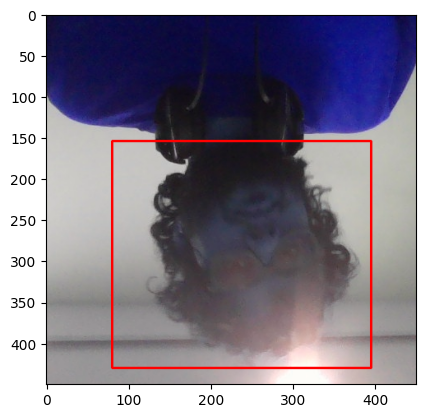

In [ ]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [39]:
import os
import cv2
import json
import numpy as np
import albumentations as alb
from matplotlib import pyplot as plt

# Define the augmentation pipeline
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))


for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0,0]
        # Construct the label path correctly, handling potential double extensions
        filename_parts = image.split('.')
        if len(filename_parts) > 2: # Handle cases like image.ext.jpg
            label_filename = '.'.join(filename_parts[:-1]) + '.json'
        else: # Handle cases like image.jpg
            label_filename = filename_parts[0] + '.json'

        label_path = os.path.join('data', partition, 'labels', label_filename)

        if os.path.exists(label_path):
            try:
                with open(label_path, 'r') as f:
                    label = json.load(f)

                # Extract coordinates only if shapes exist and have enough points
                if 'shapes' in label and len(label['shapes']) > 0 and len(label['shapes'][0]['points']) >= 2:
                    coords[0] = label['shapes'][0]['points'][0][0]
                    coords[1] = label['shapes'][0]['points'][0][1]
                    coords[2] = label['shapes'][0]['points'][1][0]
                    coords[3] = label['shapes'][0]['points'][1][1]
                    coords = list(np.divide(coords, [640,480,640,480])) # Assuming original image size is 640x480
                else:
                    # If no valid shapes, set coordinates to 0
                    coords = [0,0,0,0]
                    print(f"Warning: No valid shapes found in {label_path}. Setting bbox to [0,0,0,0].")

            except json.JSONDecodeError:
                print(f"Error: Corrupted JSON file: {label_path}")
                coords = [0,0,0,0] # Set coordinates to 0 if JSON is corrupted
            except Exception as e:
                print(f"An error occurred while reading {label_path}: {e}")
                coords = [0,0,0,0] # Set coordinates to 0 for other errors
        else:
            print(f"Warning: Label file not found for {image} at {label_path}. Setting bbox to [0,0,0,0].")
            coords = [0,0,0,0] # Set coordinates to 0 if label file doesn't exist


        try:
            for x in range(60):
                # Apply augmentation
                augmented = augmentor(image=img, bboxes=[coords] if coords != [0,0,0,0] else [], class_labels=['face'] if coords != [0,0,0,0] else []) # Pass bboxes and class_labels only if coords are not zero

                # Generate augmented image filename and save
                augmented_image_filename = f'{os.path.splitext(image)[0]}.{x}.jpg'
                cv2.imwrite(os.path.join('aug_data', partition, 'images', augmented_image_filename), augmented['image'])

                # Create annotation dictionary
                annotation = {}
                annotation['image'] = augmented_image_filename # Save the name of the augmented image

                # Populate annotation based on augmentation results
                if len(augmented['bboxes']) == 0:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0
                else:
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1

                # Generate augmented label filename and save
                augmented_label_filename = f'{os.path.splitext(image)[0]}.{x}.json'
                with open(os.path.join('aug_data', partition, 'labels', augmented_label_filename), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f"An error occurred during augmentation for {image}: {e}")

In [ ]:
annotation

### 5.2 Load Augmented Images to Tensorflow Dataset

In [40]:
import tensorflow as tf
file_path = 'aug_data/train/images/*.jpg'
train_images = tf.data.Dataset.list_files(file_path, shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [41]:
file_path = 'aug_data/test/images/*.jpg'
test_images = tf.data.Dataset.list_files(file_path, shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [42]:
file_path = 'aug_data/val/images/*.jpg'
val_images = tf.data.Dataset.list_files(file_path, shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [ ]:
train_images.as_numpy_iterator().next()

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [43]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [44]:
import tensorflow as tf

In [45]:
file_path = 'aug_data/train/labels/*.json'
train_labels = tf.data.Dataset.list_files(file_path  , shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [46]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json'  , shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [47]:
val_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.    , 0.1594, 0.7085, 1.    ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [48]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3900, 3900, 840, 840, 780, 840)

### 7.2 Create Final Datasets (Images/Labels)

In [49]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [50]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [51]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [ ]:
train.as_numpy_iterator().next()

(array([[[[0.4935049 , 0.08235294, 0.04963235],
          [0.48235294, 0.07843138, 0.05453431],
          [0.48578432, 0.08970588, 0.05147059],
          ...,
          [0.40625   , 0.38125   , 0.29938725],
          [0.40373775, 0.3803309 , 0.31629902],
          [0.41881126, 0.39283088, 0.35251224]],
 
         [[0.51029414, 0.08137255, 0.06262255],
          [0.5054534 , 0.08192402, 0.07107843],
          [0.48688725, 0.08094363, 0.06237745],
          ...,
          [0.44957107, 0.41433823, 0.34963235],
          [0.4569853 , 0.42297795, 0.3872549 ],
          [0.47175246, 0.46194854, 0.44123775]],
 
         [[0.5246936 , 0.08302696, 0.07028186],
          [0.5193015 , 0.08192402, 0.07898284],
          [0.513174  , 0.08964461, 0.08137255],
          ...,
          [0.46133578, 0.4456495 , 0.40165442],
          [0.47977942, 0.46709558, 0.44595587],
          [0.58933824, 0.59405637, 0.57150733]],
 
         ...,
 
         [[0.75177693, 0.7596201 , 0.85765934],
          [0.77003

### 7.3 View Images and Annotations

In [52]:
data_samples = train.as_numpy_iterator()

In [53]:
res = data_samples.next()

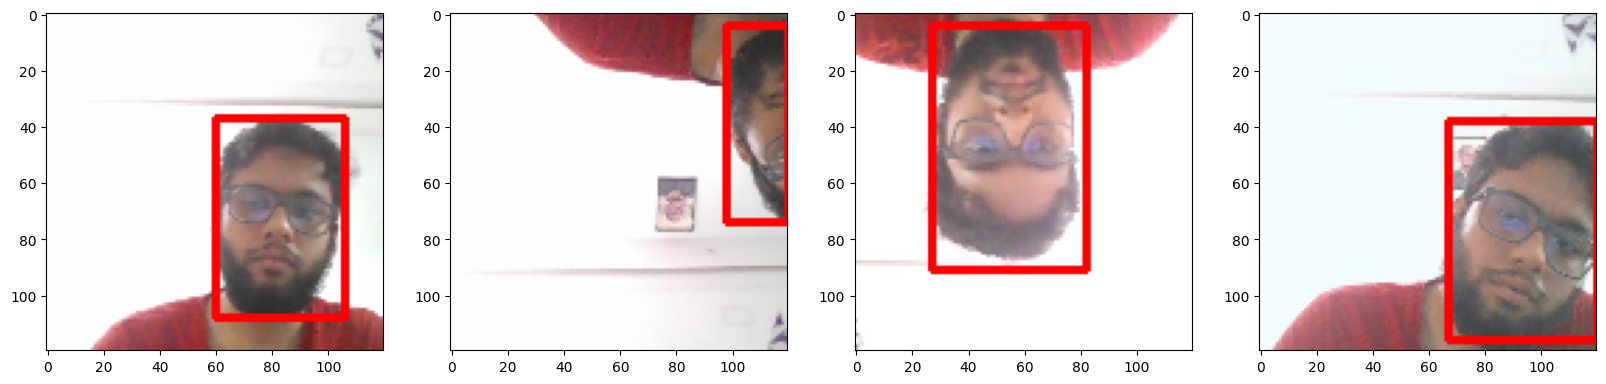

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4):
    # Extract image and coordinates
    sample_image = res[0][idx].copy()  # Create a writable copy of the image
    sample_coords = res[1][1][idx]

    # Draw rectangle on the image
    cv2.rectangle(
        sample_image,
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),  # Top-left corner
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),  # Bottom-right corner
        (255, 0, 0),  # Color (Blue in BGR)
        2  # Thickness
    )

    # Display the image
    ax[idx].imshow(sample_image)

plt.show()


# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [56]:
vgg = VGG16(include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [57]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [58]:
facetracker = build_model()

In [59]:
facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │      2,049 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 4)         │      8,196 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
X, y = train.as_numpy_iterator().next()

In [61]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4404 , 0.2363 , 0.783  , 0.709  ],
        [0.     , 0.2068 , 0.383  , 0.7817 ],
        [0.1991 , 0.1777 , 0.613  , 0.737  ],
        [0.776  , 0.54   , 0.78   , 0.5435 ],
        [0.     , 0.09973, 0.266  , 0.6284 ],
        [0.     , 0.05804, 0.3215 , 0.666  ],
        [0.4216 , 0.1937 , 0.7705 , 0.7065 ],
        [0.1973 , 0.2588 , 0.6577 , 0.978  ]], dtype=float16))

In [62]:
X.shape

(8, 120, 120, 3)

In [63]:
classes, coords = facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [ ]:
classes, coords

In [ ]:
y[1]



# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [65]:
len(train)

488

In [64]:
batches_per_epoch = len(train)


In [66]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

### 9.2 Create Localization Loss and Classification Loss

In [67]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [68]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [69]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.338335037231445>

In [ ]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5994316935539246>

In [70]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.338335037231445>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [71]:
from tensorflow.keras import saving
from tensorflow.keras.models import Model

@saving.register_keras_serializable()
class FaceTracker(Model):
    def __init__(self, facetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch
        y[0].set_shape([None, 1])

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            y0 = tf.cast(y[0], tf.float32)
            batch_classloss = self.closs(y0, classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch
        y[0].set_shape([None, 1])

        classes, coords = self.model(X, training=False)
        y0 = tf.cast(y[0], tf.float32)
        batch_classloss = self.closs(y0, classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

    def get_config(self):
        # Ensure facetracker is serialized properly
        config = super().get_config()
        config.update({"facetracker": saving.serialize_keras_object(self.model)})
        return config

    @classmethod
    def from_config(cls, config):
        facetracker = saving.deserialize_keras_object(config.pop("facetracker"))
        return cls(facetracker=facetracker, **config)


In [74]:
model = FaceTracker(facetracker)

In [75]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [73]:
logdir='logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
488/488 ━━━━━━━━━━━━━━━━━━━━ 72s 102ms/step - class_loss: 0.0561 - regress_loss: 0.3528 - total_loss: 0.3808 - val_class_loss: 0.0038 - val_regress_loss: 0.4402 - val_total_loss: 0.4421
Epoch 2/40
488/488 ━━━━━━━━━━━━━━━━━━━━ 46s 83ms/step - class_loss: 0.0215 - regress_loss: 0.1479 - total_loss: 0.1587 - val_class_loss: 2.2006e-04 - val_regress_loss: 0.5467 - val_total_loss: 0.5468
Epoch 3/40
488/488 ━━━━━━━━━━━━━━━━━━━━ 45s 80ms/step - class_loss: 0.0219 - regress_loss: 0.1406 - total_loss: 0.1515 - val_class_loss: 0.0431 - val_regress_loss: 1.0329 - val_total_loss: 1.0544
Epoch 4/40
488/488 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - class_loss: 0.0176 - regress_loss: 0.0672 - total_loss: 0.0759 - val_class_loss: 3.2661 - val_regress_loss: 1.3640 - val_total_loss: 2.9970
Epoch 5/40
488/488 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - class_loss: 0.0132 - regress_loss: 0.0596 - total_loss: 0.0662 - val_class_loss: 3.9769e-08 - val_regress_loss: 0.7282 - val_total_loss: 0.7282
Epoch 6/40


In [78]:
print("y[0] shape:", y[0].shape)
print("classes shape:", classes.shape)


y[0] shape: (8, 1)
classes shape: (8, 1)


### 11.2 Save the Model

In [79]:
model.save('drive/MyDrive/Face Detection Model.h5')

In [85]:
from google.colab import files

# Specify the path to the model file in your Google Drive
model_path_in_drive = '/content/drive/MyDrive/Face Detection Model.h5'

try:
    # Initiate the download
    files.download(model_path_in_drive)
    print(f"Download initiated for {model_path_in_drive}. Check your browser's download folder.")
except FileNotFoundError:
    print(f"Error: File not found at {model_path_in_drive}. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred during download: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated for /content/drive/MyDrive/Face Detection Model.h5. Check your browser's download folder.


In [ ]:
from tensorflow.keras.models import load_model

# Load model without compiling
fashgan = load_model(
    '/content/drive/MyDrive/FaceDetection_model(1).h5',
    custom_objects={
        'FaceTracker': FaceTracker,
        'classloss': classloss,
        'regressloss': regressloss  # Ensure this function is defined
    },
    compile=False  # Disable automatic compilation
)


### 10.3 Plot Performance

In [ ]:
hist.history

{'class_loss': [7.266603461175691e-06,
  1.3977174830870354e-06,
  1.2930765933560906e-06,
  3.337306395678752e-07,
  3.4841065144064487e-07,
  1.0534077432566846e-07,
  2.9455669903200032e-08,
  1.2741821819872712e-07,
  2.2283464318206825e-07,
  5.3488665940903957e-08,
  6.355324444484722e-08,
  1.0141732786905777e-08,
  2.057685719591973e-07,
  1.2211044619903078e-08,
  2.942608468003982e-08,
  1.0095719815694792e-08,
  7.375006383369964e-09,
  1.5429555411117235e-09,
  2.3304446372662824e-08,
  7.58655449573098e-09,
  1.047564257561362e-09,
  2.2703034119331278e-08,
  1.247671477244694e-08,
  1.261837745403227e-08,
  7.231579779443109e-09,
  4.459249858257408e-09,
  1.1536000599221552e-08,
  1.565783769308382e-08,
  5.144659365186044e-09,
  1.0772454039909007e-09,
  1.9535122408598227e-09,
  2.3349794986415873e-08,
  4.900959194031884e-09,
  4.841252287945963e-09,
  4.566862443766695e-09,
  8.086527003570154e-09,
  3.638834789043699e-09,
  4.88636953122068e-09,
  6.985726996866504e

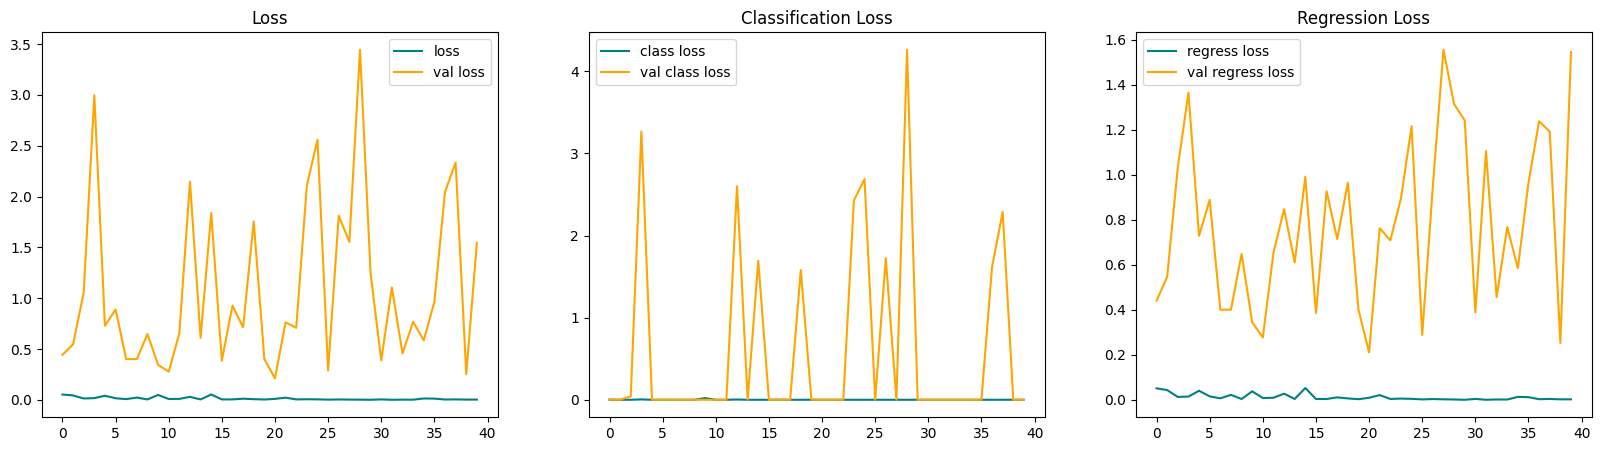

In [80]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [81]:
test_data = test.as_numpy_iterator()

In [82]:
test_sample = test_data.next()

In [83]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


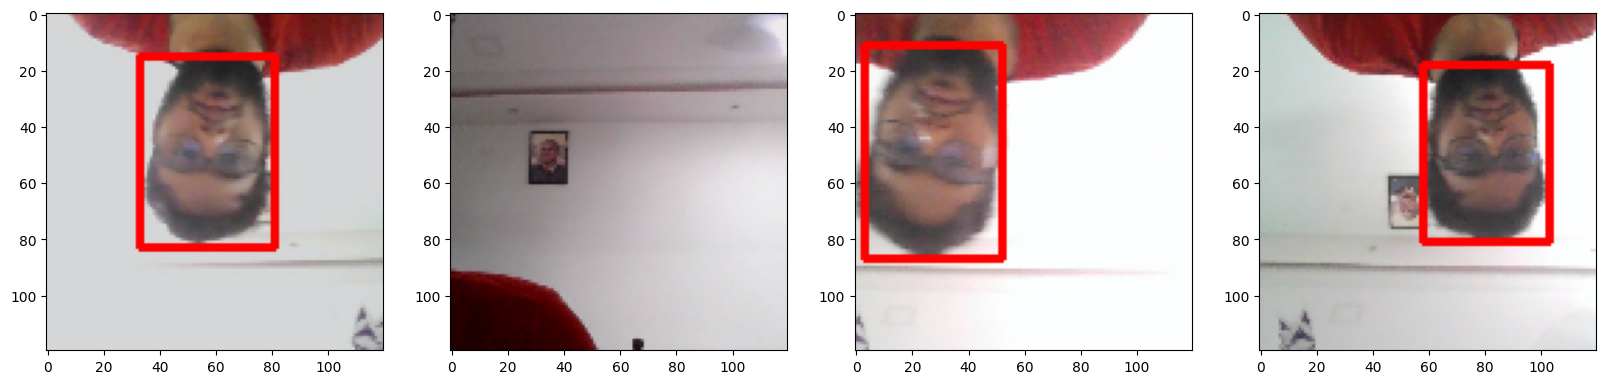

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)